## CDC Wonder Data
### This notebook shows the data from CDC Wonder Database for cross-validating the results obtained from the API call data results from US Census Bureau

* Dataset for the male population of Illinois by age groups and race/ethnicity from 2010 - 2020

* Raw data file is downloaded from the Wonder Database from CDC


**Steps for downloading the raw file from the CDC Wonder Database**
* ***1. Organize Table Layout***: <br>
    Select Group Results by "Yearly July 1st Estimates", then by "Ten-Year Age Groups", then by "Ethnicity", then by "Race"

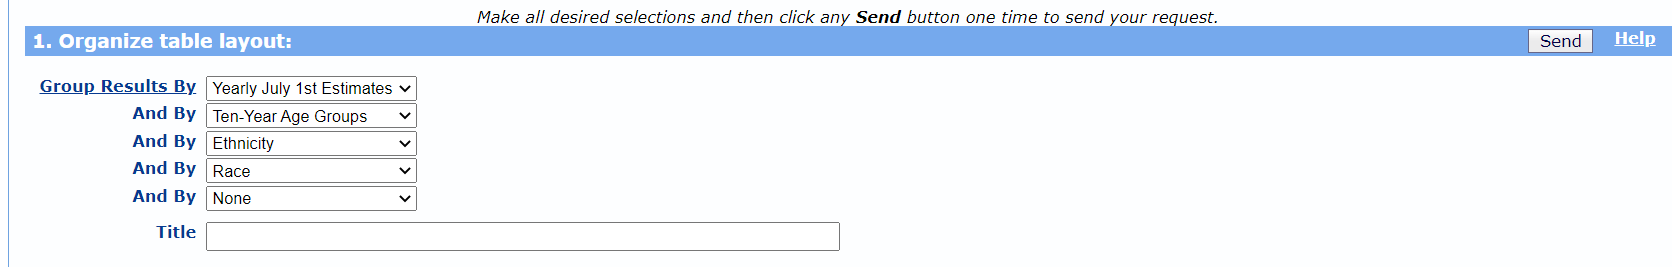

* ***2. Select Location***: <br>
    Click on the radio button "State", then Choose Illinois:
    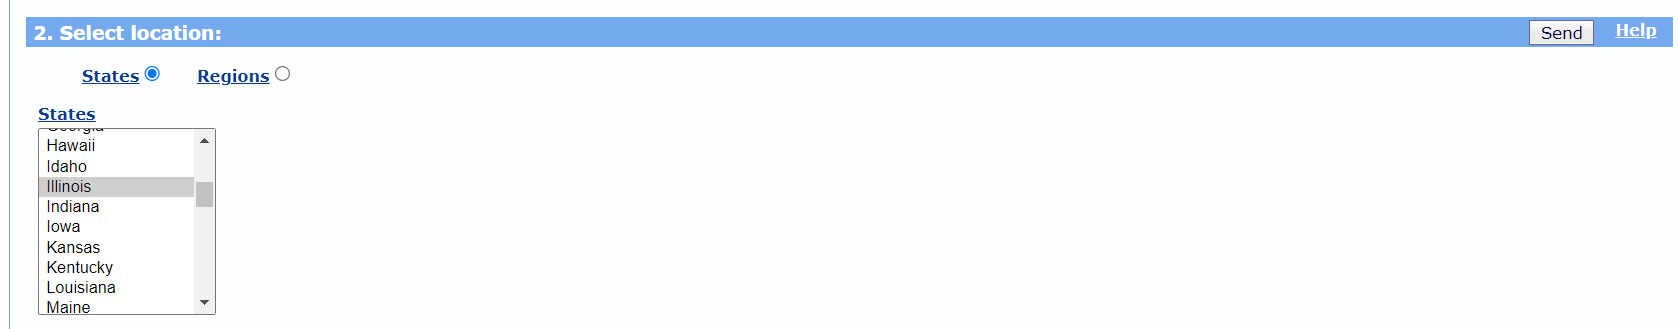
    
* ***3. Select Demographics and Years***: <br>
    Click on the "Ten-Year Age Groups" radio button, select "All Ages"; Select "Black or African American" and "White" in the Race field, select "All Ethnicities" in the Ethnicity field, select "All Years" in the Yearly July 1st Estimates field, and select "Male" in the Gender field

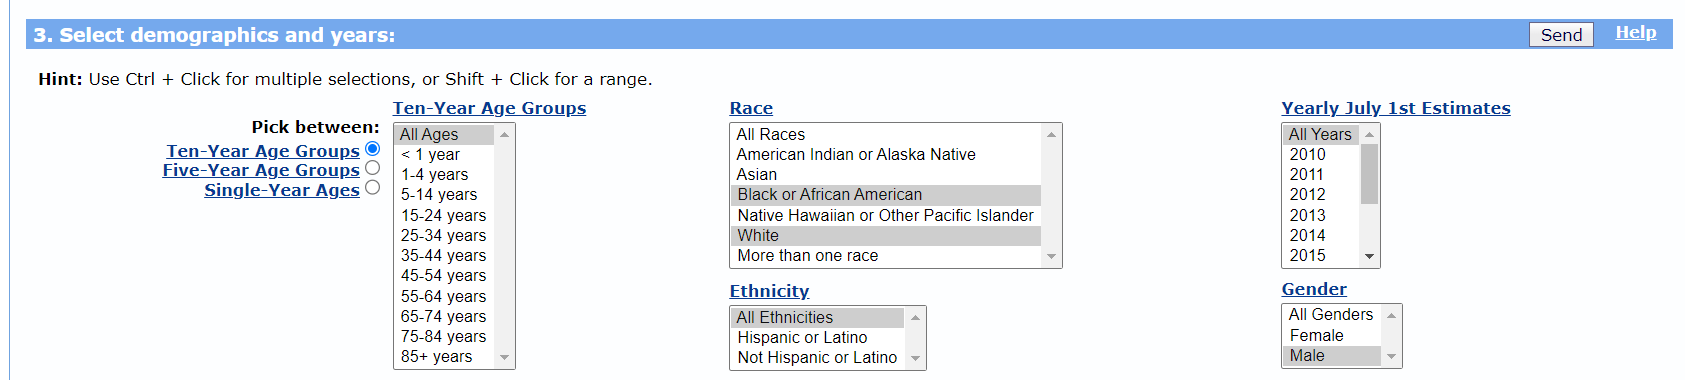


* ***4. Other Options***: <br>
    Check the "Export Results" box and click "send" to download the output as a .txt file, and save it to the working directory: 
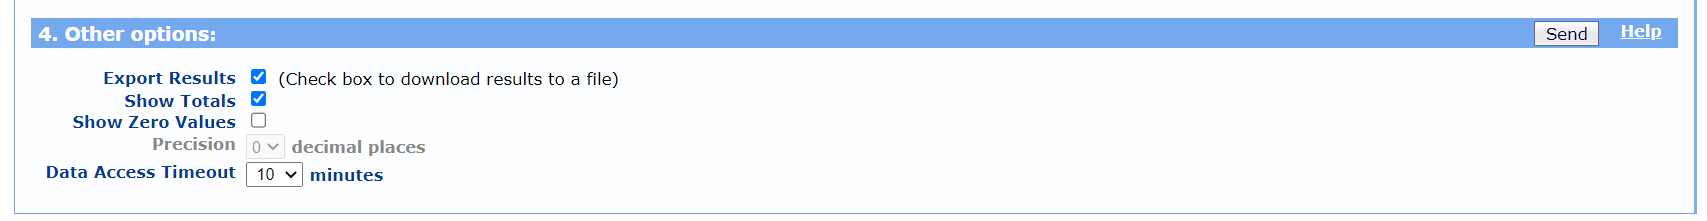



**Processing steps before loading into this notebook:**
1. Read the downloaded .txt file in Excel
<br>

***Then in Power Query:***
<br>
> 2. Select the first row as the header
3. Remove the columns 'Ethnicity Code', 'Race Code', 'Ten-Year Age Group Code', and 'Yearly July 1st Estimates Code'
4. Change the data type to Interger for the column 'Yearly July 1st Estimates' and 'Population'
5. Remove the most bottom 23 rows
6. Re-order the columns to the current order


* The dataset file is stored under this repository with the file name 'wonder_CDC_dataset.csv'

*Link to the raw dataset:*<br>
https://wonder.cdc.gov/single-race-single-year-v2020.html

In [28]:
# Loading the dataset

import pandas as pd

## Read the dataset file downloaded from CDC Wonder Database
CDC_df = pd.read_csv('wonder_CDC_dataset.csv')
CDC_df = CDC_df.iloc[:-3,:]

## Cleaning and Transforming the format of the dataset
CDC_df['Yearly July 1st Estimates'] = CDC_df['Yearly July 1st Estimates'].astype('int32')
CDC_df['Population'] = CDC_df['Population'].astype('int32')
CDC_df['Notes'] = CDC_df['Notes'].fillna("Sub-group Total")
CDC_df['Race'] = CDC_df['Race'].fillna("All Race")
CDC_df['Ethnicity'] = CDC_df['Ethnicity'].fillna("All Ethnicity")

## Function for querying the dataset
def query_func(df: pd.DataFrame, 
               year='all', 
               race: str='all', 
               ethnicity: str='all',
               age_group: str='all'):
    
    ### Setting the display dataframe to show all rows
    pd.set_option('display.max_rows', None)
    
    ### Set up the query conditions text string
    query_string = str()
    
    if year != 'all':
        query_string += f'`Yearly July 1st Estimates` == {year}'
    
    if race != 'all':
        query_string += '& ' + f'`Race` == "{race}"'
    
    if ethnicity != 'all':
        query_string += '& ' + f'`Ethnicity` == "{ethnicity}"'
        
    if age_group != 'all':
        query_string += '& ' + f'`Ten-Year Age Groups` == "{age_group}"'
    

    ### Return the query results
    return df.query(query_string)

    
    
## Display the final dataframe

# Rename the column
CDC_df_display = CDC_df.rename(columns = {'Yearly July 1st Estimates':'Year'})

# Set the title
CDC_df_display = CDC_df_display.style.set_caption("CDC Wonder Data 2010-2020, Population Breakdown by Age and Racial Group")


In [29]:
# Displaying the first 10 rows
CDC_df_display.hide(range(10, len(CDC_df), 1), 0)

,Year,Ten-Year Age Groups,Ethnicity,Race,Notes,Population
0,2010,< 1 year,Hispanic or Latino,Black or African American,Sub-group Total,810
1,2010,< 1 year,Hispanic or Latino,White,Sub-group Total,18903
2,2010,< 1 year,Hispanic or Latino,All Race,Total,19713
3,2010,< 1 year,Not Hispanic or Latino,Black or African American,Sub-group Total,13152
4,2010,< 1 year,Not Hispanic or Latino,White,Sub-group Total,42305
5,2010,< 1 year,Not Hispanic or Latino,All Race,Total,55457
6,2010,< 1 year,All Ethnicity,All Race,Total,75170
7,2010,1-4 years,Hispanic or Latino,Black or African American,Sub-group Total,3528
8,2010,1-4 years,Hispanic or Latino,White,Sub-group Total,77754
9,2010,1-4 years,Hispanic or Latino,All Race,Total,81282


In [30]:
# Displaying the bottom 10 rows
CDC_df_display.hide(range(0, len(CDC_df)-10, 1), 0)

,Year,Ten-Year Age Groups,Ethnicity,Race,Notes,Population
848,2020,75-84 years,Not Hispanic or Latino,All Race,Total,228065
849,2020,75-84 years,All Ethnicity,All Race,Total,245189
850,2020,85+ years,Hispanic or Latino,Black or African American,Sub-group Total,181
851,2020,85+ years,Hispanic or Latino,White,Sub-group Total,5772
852,2020,85+ years,Hispanic or Latino,All Race,Total,5953
853,2020,85+ years,Not Hispanic or Latino,Black or African American,Sub-group Total,8362
854,2020,85+ years,Not Hispanic or Latino,White,Sub-group Total,72980
855,2020,85+ years,Not Hispanic or Latino,All Race,Total,81342
856,2020,85+ years,All Ethnicity,All Race,Total,87295
857,2020,nan,All Ethnicity,All Race,Total,5640298


## Male Population Statistics for Illinois and Chicago city from the US Census Bureau

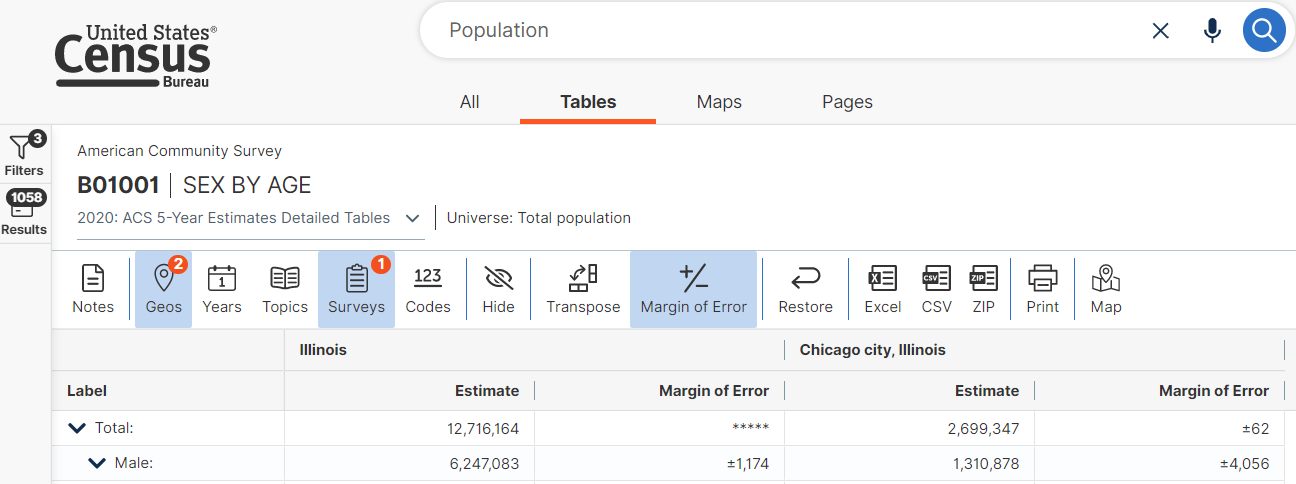

*Source: US Census Bureau*<br>
*https://data.census.gov/cedsci/table?q=Population&g=0400000US17_1600000US1714000&d=ACS%205-Year%20Estimates%20Detailed%20Tables*

### Note on the geographical area reported from the US Census Bureau

#### Place Code vs Metropolian Statistical Area Code
The geographical area reported here for Chicago is "Chicago city, Illinois", which is under the standard geographic identifier (GEOID) unit "Place" as designated by the US Census Bureau, and is defined as a concentration of population. A place may or may not have legally prescribed limits, powers, or functions.

As such, it should be noted that the "Place" code "Chicago city, Illinois" used here is different from the Metropolitan Statistical Area (MSA)* for Chicago, i.e. "Chicago-Naperville-Elgin" MSA. 

*Reference:* 
<br>*https://www.census.gov/programs-surveys/geography/guidance/geo-identifiers.html*
<br>*https://www2.census.gov/geo/pdfs/reference/GARM/Ch13GARM.pdf*

<font size="1.9"> \**Note: An MSA consists of one or more counties that contain a city of 50,000 or more inhabitants, or contain a Census Bureau-defined urbanized area (UA) and have a total population of at least 100,000 (75,000 in New England). Counties containing the principal concentration of population—the largest city and surrounding densely settled area—are components of the MSA.* </font>

In [176]:
## Calculate the Ratio of Male Population in Chicago Metro Area over Illinois in 2020

pct_IL_Chi = round((1310878/6247083)*100, 1)

print('Ratio of Male Population in Chicago Metro Area over Illinois = 4,640,471/6,247,083 = ' + str(pct_IL_Chi) + '%')

Ratio of Male Population in Chicago Metro Area over Illinois = 4,640,471/6,247,083 = 21.0%


From the US Census Bureau data, the male population is 6,247,083 in the state of Illinois and 1,310,878 in the Chicago City in 2020.<br><br>

### Race Profile across the state of Illinois and the city of Chicago:

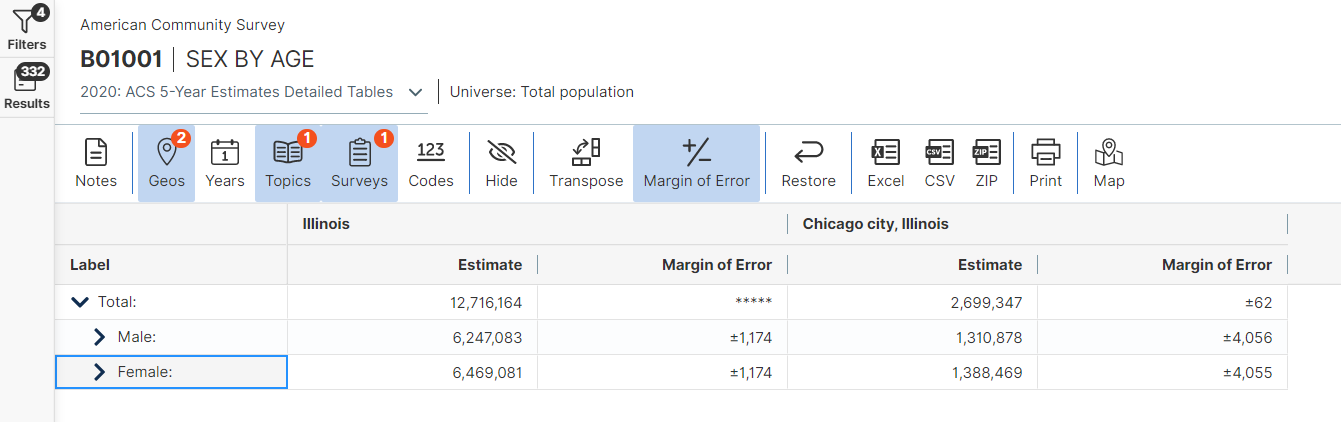
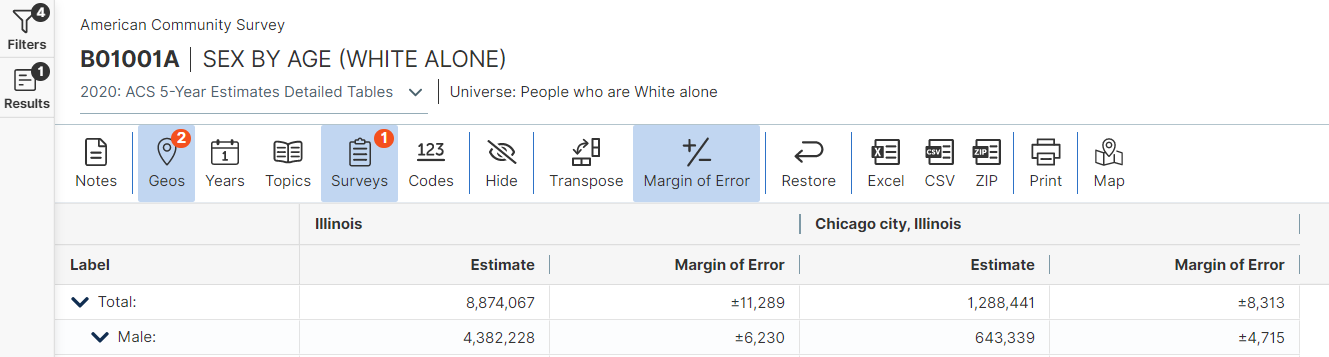
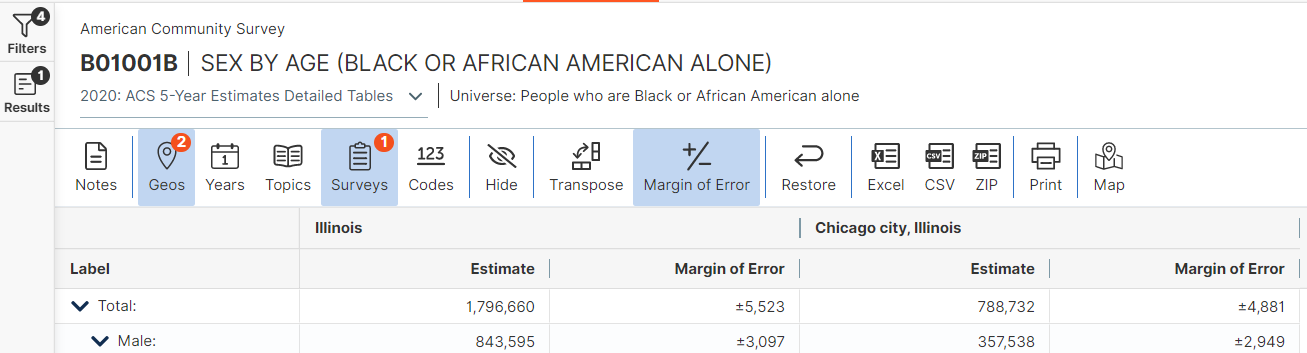
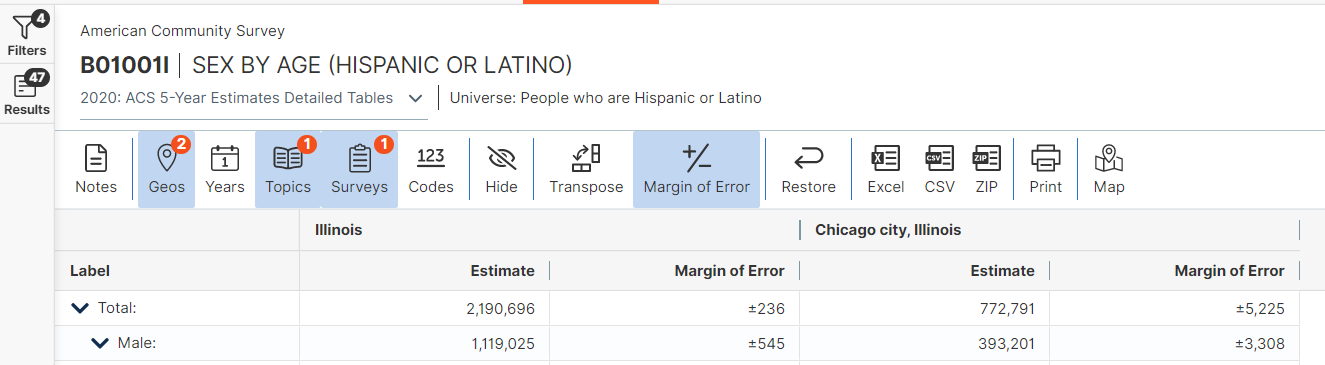

*Source: US Census Bureau*<br>
*https://data.census.gov/cedsci/table?q=SEX&g=0400000US17_1600000US1714000&d=ACS%205-Year%20Estimates%20Detailed%20Tables*
*https://data.census.gov/cedsci/table?q=B01001A%3A%20SEX%20BY%20AGE%20%28WHITE%20ALONE%29&g=0400000US17_1600000US1714000&d=ACS%205-Year%20Estimates%20Detailed%20Tables&tid=ACSDT5Y2020.B01001A*
<br>
*https://data.census.gov/cedsci/table?q=B01001B%3A%20SEX%20BY%20AGE%20%28BLACK%20OR%20AFRICAN%20AMERICAN%20ALONE%29&g=0400000US17_1600000US1714000&d=ACS%205-Year%20Estimates%20Detailed%20Tables&tid=ACSDT5Y2020.B01001B*
<br>
*https://data.census.gov/cedsci/table?q=Hispanic&g=0400000US17_1600000US1714000&d=ACS%205-Year%20Estimates%20Detailed%20Tables*

In [177]:
## Proportion of male population in the state of Illinois and the city of Chicago by race/ethnicity

IL_male_population = 6247083
chicago_male_population = 1310878
IL_male_white = 4382228
chicago_male_white = 643339
IL_male_black = 843595
chicago_male_black = 357538
IL_male_hispanic = 1119025
chicago_male_hispanic = 393201

chicago_white_proportion = chicago_male_white/chicago_male_population
IL_white_proportion = IL_male_white/IL_male_population
chicago_black_proportion = chicago_male_black/chicago_male_population
IL_black_proportion = IL_male_black/IL_male_population
chicago_hispanic_proportion = chicago_male_hispanic/chicago_male_population
IL_hispanic_proportion = IL_male_hispanic/IL_male_population

print(f"Proportion of White Male in the city of Chicago: {round(chicago_white_proportion,5)*100} %")
print(f"Proportion of White Male in the state of Illinois: {round(IL_white_proportion, 5)*100} %")
print(f"Proportion of Black Male in the city of Chicago: {round(chicago_black_proportion,5)*100} %")
print(f"Proportion of Black Male in the state of Illinois: {round(IL_black_proportion, 5)*100} %")
print(f"Proportion of Hispanic Male in the city of Chicago: {round(chicago_hispanic_proportion,5)*100} %")
print(f"Proportion of Hispanic Male in the state of Illinois: {round(IL_hispanic_proportion, 5)*100} %")


Proportion of White Male in the city of Chicago: 49.077 %
Proportion of White Male in the state of Illinois: 70.148 %
Proportion of Black Male in the city of Chicago: 27.275 %
Proportion of Black Male in the state of Illinois: 13.504 %
Proportion of Hispanic Male in the city of Chicago: 29.995 %
Proportion of Hispanic Male in the state of Illinois: 17.913 %


In [178]:
## Save the racial proportion into a dataframe
chicago_IL_racial_proportion = pd.DataFrame({'Racial Group':['Chicago White Proportion', 'IL White Proportion', 'Chicago Black Proportion', 'IL Black Proportion', 'Chicago Hispanic Proportion', 'IL Hispanic Proportion'],
             'Proportion':[chicago_white_proportion, IL_white_proportion, chicago_black_proportion, IL_black_proportion, chicago_hispanic_proportion, IL_hispanic_proportion]})

display(chicago_IL_racial_proportion)

,Racial Group,Proportion
0,Chicago White Proportion,0.49
1,IL White Proportion,0.70
2,Chicago Black Proportion,0.27
3,IL Black Proportion,0.14
4,Chicago Hispanic Proportion,0.30
5,IL Hispanic Proportion,0.18


From the US Census Bureau data, the proportion of male by race/ethnicity in the state of Illinois and the city of Chicago City in 2020 is shown above.<br><br>As such, we can infer that the population statistic in the CDC Wonder dataset multiplied by c. 21.0% (this ratio should roughly hold for other years as well), and adjusting for the difference in the racial proportion within Illinois and the city of Chicago, should be roughly in line with the population statistic in the ACS API data, and can serve as a reference point to verify the accuracy of the data.

## Example Demonstrations

Below shows an example of using the query function *query_func* defined above to query the dataset from CDC Wonder using criteria such as year, race, and age group:

### Example 1: Query by Year and Race

In [179]:
## Query the year to be 2018, and race to be "White" and "Non-Hispanic"
df_2018 = query_func(CDC_df, year=2018, race='White', ethnicity='Not Hispanic or Latino')

# Rename the column
df_2018 = df_2018.rename(columns = {'Yearly July 1st Estimates':'Year'})

# Re-set the index
df_2018.index = pd.RangeIndex(start=1, stop=len(df_2018)+1, step=1)

# Set the title
df_2018_display = df_2018.style.set_caption("CDC Wonder Data 2018, Non-Hispanic White Population Breakdown by Age Groups")

display(df_2018_display)

,Year,Ten-Year Age Groups,Ethnicity,Race,Notes,Population
1,2018,< 1 year,Not Hispanic or Latino,White,Sub-group Total,38025
2,2018,1-4 years,Not Hispanic or Latino,White,Sub-group Total,160085
3,2018,5-14 years,Not Hispanic or Latino,White,Sub-group Total,415246
4,2018,15-24 years,Not Hispanic or Latino,White,Sub-group Total,455539
5,2018,25-34 years,Not Hispanic or Latino,White,Sub-group Total,507324
6,2018,35-44 years,Not Hispanic or Latino,White,Sub-group Total,476366
7,2018,45-54 years,Not Hispanic or Latino,White,Sub-group Total,517513
8,2018,55-64 years,Not Hispanic or Latino,White,Sub-group Total,581494
9,2018,65-74 years,Not Hispanic or Latino,White,Sub-group Total,403432
10,2018,75-84 years,Not Hispanic or Latino,White,Sub-group Total,193617


#### Collapse the age group for under 5 years old for cross-validation with ACS data

The age group '< 1 year' and '1-4 years' are collapsed into one age group:

In [180]:
## Collapse the age group for under 5 years old
df_2018.iloc[1,5] = sum(df_2018.iloc[0:2,5])

df_2018.iloc[1,1] = 'under 5 years'

df_2018 = df_2018.iloc[1:,:]

# Re-set the index
df_2018.index = pd.RangeIndex(start=1, stop=len(df_2018)+1, step=1)

### Cross-check with the data from the ACS API Call:

### Data from the ACS API Call for the White, Non-Hispanic, Male population in the city of Chicago in 2018


In [181]:
## Loading the sample output from the ACS API Call
acs_df_2018 = pd.read_csv('df_Chicago_2018.csv')

## Filtering for White, Non-Hispanic, Male population in the city of Chicago in 2018
acs_df_2018_white = acs_df_2018.query('Concept == "SEX BY AGE (WHITE ALONE, NOT HISPANIC OR LATINO)"')

## Removing the first row which shows the total male count
acs_df_2018_white = acs_df_2018_white[1:]

# Rename the column
acs_df_2018_white = acs_df_2018_white.rename(columns = {'Unnamed: 0':'Age Group'})

# Re-set the index
acs_df_2018_white.index = pd.RangeIndex(start=1, stop=len(acs_df_2018_white)+1, step=1)

# Set the title
acs_df_2018_white_display = acs_df_2018_white.style.set_caption("ACS Data 2018, Non-Hispanic White Population Breakdown by Age Groups")
display(acs_df_2018_white_display)



,Age Group,Value,Concept,City
1,Estimate Total Male Under 5 years,23648,"SEX BY AGE (WHITE ALONE, NOT HISPANIC OR LATINO)",Chicago city
2,Estimate Total Male 5 to 9 years,14956,"SEX BY AGE (WHITE ALONE, NOT HISPANIC OR LATINO)",Chicago city
3,Estimate Total Male 10 to 14 years,14600,"SEX BY AGE (WHITE ALONE, NOT HISPANIC OR LATINO)",Chicago city
4,Estimate Total Male 15 to 17 years,7064,"SEX BY AGE (WHITE ALONE, NOT HISPANIC OR LATINO)",Chicago city
5,Estimate Total Male 18 and 19 years,7658,"SEX BY AGE (WHITE ALONE, NOT HISPANIC OR LATINO)",Chicago city
6,Estimate Total Male 20 to 24 years,31265,"SEX BY AGE (WHITE ALONE, NOT HISPANIC OR LATINO)",Chicago city
7,Estimate Total Male 25 to 29 years,59171,"SEX BY AGE (WHITE ALONE, NOT HISPANIC OR LATINO)",Chicago city
8,Estimate Total Male 30 to 34 years,57585,"SEX BY AGE (WHITE ALONE, NOT HISPANIC OR LATINO)",Chicago city
9,Estimate Total Male 35 to 44 years,67453,"SEX BY AGE (WHITE ALONE, NOT HISPANIC OR LATINO)",Chicago city
10,Estimate Total Male 45 to 54 years,57464,"SEX BY AGE (WHITE ALONE, NOT HISPANIC OR LATINO)",Chicago city


#### Collapse the age groups for cross-validation with the CDC Wonder data

The age groups from the data frame extracted from the ACS API call are collapsed to match the age groups in CDC Wonder data:

In [182]:
## Insert the new ten-year age groups
acs_df_2018_white.insert(4, 'Ten-Year Age Groups', ['under 5 years', '5-14 years', '5-14 years', '15-24 years', '15-24 years', '15-24 years', '25-34 years', '25-34 years', '35-44 years', '45-54 years', '55-64 years', '65-74 years', '75-84 years', '85+ years'])

## Sum the values based on the new age groups
acs_adjusted_age_gp_values = acs_df_2018_white.groupby('Ten-Year Age Groups', sort=False).sum().reset_index()

### Adjust the population of white male in Illinois to provide an estimate of the number in the city of Chicago:

In [183]:
## Making the adjustment on the CDC Wonder Data

import warnings
warnings.filterwarnings("ignore")

df_2018.loc[:,'Population'] = round(df_2018.loc[:,'Population']*0.21*(chicago_white_proportion/IL_white_proportion),2)

df_2018.rename(columns={"Population":"CDC Wonder Adjusted Population"}, inplace=True)


## Merge the two data frames from ACS and CDC Wonder adjusted values
df_2018_cdc_acs_merged = df_2018.merge(acs_adjusted_age_gp_values, on='Ten-Year Age Groups')

## Renameing the columns
df_2018_cdc_acs_merged.rename(columns={"Value":"ACS API Population"}, inplace=True)

## Calculating Percentage Difference
df_2018_cdc_acs_merged.loc[:,'Percentage Difference'] = (df_2018_cdc_acs_merged.loc[:,'ACS API Population']/df_2018_cdc_acs_merged.loc[:,'CDC Wonder Adjusted Population'])-1


## Set the title
df_2018_cdc_acs_merged_display = df_2018_cdc_acs_merged.style.set_caption("ACS vs CDC Wonder Data 2018, Non-Hispanic White Population Breakdown by Age Groups")


In [184]:
## Display the results
df_2018_cdc_acs_merged_display.format(precision=2)
              
display(df_2018_cdc_acs_merged_display)

,Year,Ten-Year Age Groups,Ethnicity,Race,Notes,CDC Wonder Adjusted Population,ACS API Population,Percentage Difference
0,2018,under 5 years,Not Hispanic or Latino,White,Sub-group Total,29106.21,23648,-0.19
1,2018,5-14 years,Not Hispanic or Latino,White,Sub-group Total,61007.70,29556,-0.52
2,2018,15-24 years,Not Hispanic or Latino,White,Sub-group Total,66927.53,45987,-0.31
3,2018,25-34 years,Not Hispanic or Latino,White,Sub-group Total,74535.75,116756,0.57
4,2018,35-44 years,Not Hispanic or Latino,White,Sub-group Total,69987.42,67453,-0.04
5,2018,45-54 years,Not Hispanic or Latino,White,Sub-group Total,76032.71,57464,-0.24
6,2018,55-64 years,Not Hispanic or Latino,White,Sub-group Total,85432.76,52589,-0.38
7,2018,65-74 years,Not Hispanic or Latino,White,Sub-group Total,59272.00,37870,-0.36
8,2018,75-84 years,Not Hispanic or Latino,White,Sub-group Total,28446.10,16410,-0.42
9,2018,85+ years,Not Hispanic or Latino,White,Sub-group Total,10700.29,6065,-0.43


### Comparison of the results

As an example, looking at the age group for 35-44, the number from the ACS API data pull is 67453, while the estimate number from the CDC wonder data after adjusting for the population proportion and racial proportion difference in Illinois and Chicago is 69987. As such, we can verify that the numbers we get from the ACS API data pull is sensible.